In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
import seaborn as sns
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<Axes: >

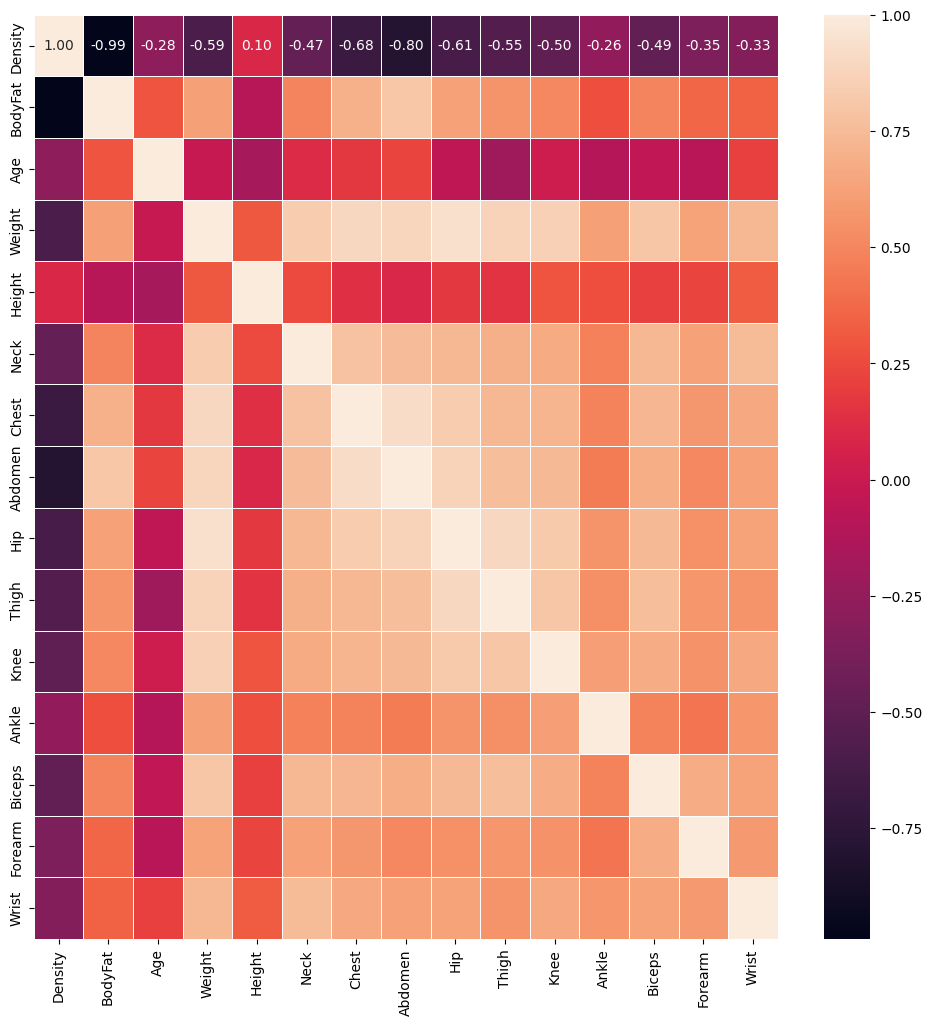

In [4]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

In [6]:
bin_labels = [0, 1, 2, 3,4,5,6,7,8]

df['BodyFatEncoded'] = pd.cut(df['BodyFat'], bins=9, labels=bin_labels)

In [7]:
df[['BodyFat','BodyFatEncoded']]

,BodyFat,BodyFatEncoded
0,12.3,2
1,6.1,1
2,25.3,4
3,10.4,1
4,28.7,5
...,...,...
247,11.0,2
248,33.6,6
249,29.3,5
250,26.0,4


In [8]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(columns=['BodyFat','Density'])
y = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Calculate precision metrics
y_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 1.246952956362378
Mean Squared Error: 2.038330327457254
R2 Score: 0.9561819669509823


In [16]:
# Tính R-squared
r2 = r2_score(y_test, y_pred)*100

print("R-squared: {:.2f}".format(r2))

R-squared: 95.62


In [17]:
 feature_importance = linear_model.coef_

# Retrain the model using only important columns
most_important_columns = np.argsort(np.abs(feature_importance))[-3:]
X_train_important = X_train.iloc[:, most_important_columns]
X_test_important = X_test.iloc[:, most_important_columns]

linear_model_important = LinearRegression()
linear_model_important.fit(X_train_important, y_train)

# Calculate precision metrics with the reduced feature set
y_pred_important = linear_model_important.predict(X_test_important)
mae_important = mean_absolute_error(y_test, y_pred_important)
mse_important = mean_squared_error(y_test, y_pred_important)
r2_important = r2_score(y_test, y_pred_important)

print(f"Mean Absolute Error (Important Features): {mae_important}")
print(f"Mean Squared Error (Important Features): {mse_important}")
print(f"R2 Score (Important Features): {r2_important}")

Mean Absolute Error (Important Features): 1.25677871372946
Mean Squared Error (Important Features): 2.0460484610012877
R2 Score (Important Features): 0.9560160500600086


In [18]:
# Create BodyFatEncoded column
bin_labels = [0, 1, 2, 3,4,5,6,7,8]

df['BodyFatEncoded'] = pd.cut(df['BodyFat'], bins=9, labels=bin_labels)

In [19]:
#Train a model to predict BodyFatEncoded
#Not splitting this time, since predictions must be made in the whole dataset
X_encoded = df.iloc[:, most_important_columns]
y_encoded = df['BodyFatEncoded']

logistic_model = LogisticRegression()
logistic_model.fit(X_encoded, y_encoded)

# Predict the BodyFatEncoded labels
df['PredictedFatLabel'] = logistic_model.predict(X_encoded)

/Users/tranvietanh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Train a linear regression model using important columns and predicted labels
X_combined = df.iloc[:,np.append(most_important_columns, -1)] #Appending -1 (PredictedFatLabel)
y_combined = df['BodyFat']

X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

linear_model_combined = LinearRegression()
linear_model_combined.fit(X_train_combined, y_train_combined)

y_pred_combined = linear_model_combined.predict(X_test_combined)
mae_combined = mean_absolute_error(y_test_combined, y_pred_combined)
mse_combined = mean_squared_error(y_test_combined, y_pred_combined)
r2_combined = r2_score(y_test_combined, y_pred_combined)

print(f"Mean Absolute Error (Combined Models): {mae_combined}")
print(f"Mean Squared Error (Combined Models): {mse_combined}")
print(f"R2 Score (Combined Models): {r2_combined}")

Mean Absolute Error (Combined Models): 5.723779781723382
Mean Squared Error (Combined Models): 48.15692499502214
R2 Score (Combined Models): -0.035230503391112444


In [21]:
X


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFatEncoded
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,2
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,4
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,2
248,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,6
249,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,5
250,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,4


In [22]:
df[['BodyFat','BodyFatEncoded']]

,BodyFat,BodyFatEncoded
0,12.3,2
1,6.1,1
2,25.3,4
3,10.4,1
4,28.7,5
...,...,...
247,11.0,2
248,33.6,6
249,29.3,5
250,26.0,4


In [23]:
print(df[['BodyFat', 'BodyFatEncoded']])

     BodyFat BodyFatEncoded
0       12.3              2
1        6.1              1
2       25.3              4
3       10.4              1
4       28.7              5
..       ...            ...
247     11.0              2
248     33.6              6
249     29.3              5
250     26.0              4
251     31.9              6

[252 rows x 2 columns]
